   ID        date  score sentiment                         category
0   1        date     70   négatif          problème de facturation
1   2  2023-11-16     70   négatif       service client injoignable
2   3  2023-11-26     60   négatif      problème avec l'application
3   4  2023-12-21     85   négatif  Catégorie: Delai d'intervention
4   5  2023-12-28     80   négatif       service client injoignable

Conversion des dates réussie.

Dates invalides après conversion :
   ID date  score sentiment                 category
0   1  NaT     70   négatif  problème de facturation

Les plaintes les plus fréquentes :
category
problème de facturation                   253
service client injoignable                 85
information complémentaire                 49
panne et urgences                          44
Catégorie: Delai d'intervention            42
problème avec l'application                37
Catégorie: autre                           37
Catégorie: Probleme avec l'application     14
délai 

C:\Users\yvenl\AppData\Local\Temp\ipykernel_36268\852313512.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')  # 'coerce' convertit les erreurs en NaT


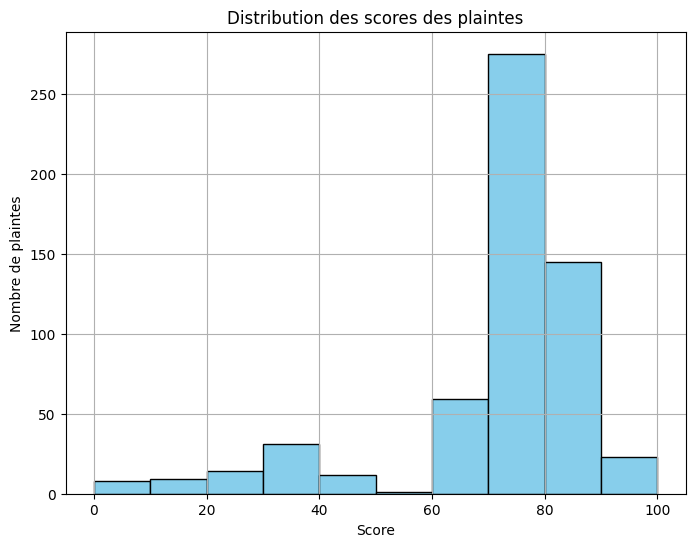

In [2]:
import pandas as pd

# Charger les données à partir du fichier CSV
df = pd.read_csv('model_responses.csv')

# Afficher les premières lignes pour vérifier le format de la date
print(df.head())

# Essayer de convertir la colonne 'date' en format datetime
try:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # 'coerce' convertit les erreurs en NaT
    print("\nConversion des dates réussie.")
except Exception as e:
    print("\nErreur de conversion des dates :", e)

# Vérifiez les dates invalides (NaT)
print("\nDates invalides après conversion :")
print(df[df['date'].isna()])

# Question 1: Quelles sont les plaintes les plus fréquentes ?
most_frequent_complaints = df['category'].value_counts()
print("\nLes plaintes les plus fréquentes :")
print(most_frequent_complaints)

# Question 2: Quel est le volume de plaintes sur une période donnée ? (par exemple, décembre 2023)
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Reconvertir au cas où certaines dates étaient invalides
december_complaints = df[df['date'].dt.month == 12]
print("\nVolume des plaintes en décembre 2023 :")
print(len(december_complaints))

# Question 3: Qui sont les utilisateurs qui se plaignent le plus ?
# Impossible à répondre avec les données actuelles (pas d'ID utilisateur).

# Question 4: Comment se répartissent les plaintes par sujet ?
complaints_by_category = df['category'].value_counts()
print("\nRépartition des plaintes par sujet :")
print(complaints_by_category)

# Question 5: Quel est le sentiment global des plaintes ?
sentiment_distribution = df['sentiment'].value_counts()
print("\nRépartition des sentiments :")
print(sentiment_distribution)

# Bonus : Afficher la distribution des scores pour voir les plaintes positives vs négatives
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
df['score'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution des scores des plaintes")
plt.xlabel("Score")
plt.ylabel("Nombre de plaintes")
plt.show()


C:\Users\yvenl\AppData\Local\Temp\ipykernel_36268\1110775052.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')



Répartition des plaintes par mois :
year_month
2023-11     2
2023-12     7
2024-01    60
2024-02    57
2024-03    55
2024-04    41
2024-05    41
2024-06    22
2024-07    28
2024-08    28
2024-09    24
2024-10    40
2024-11    43
2024-12    44
2025-01    41
2025-02    37
2025-03     6
Freq: M, Name: count, dtype: int64


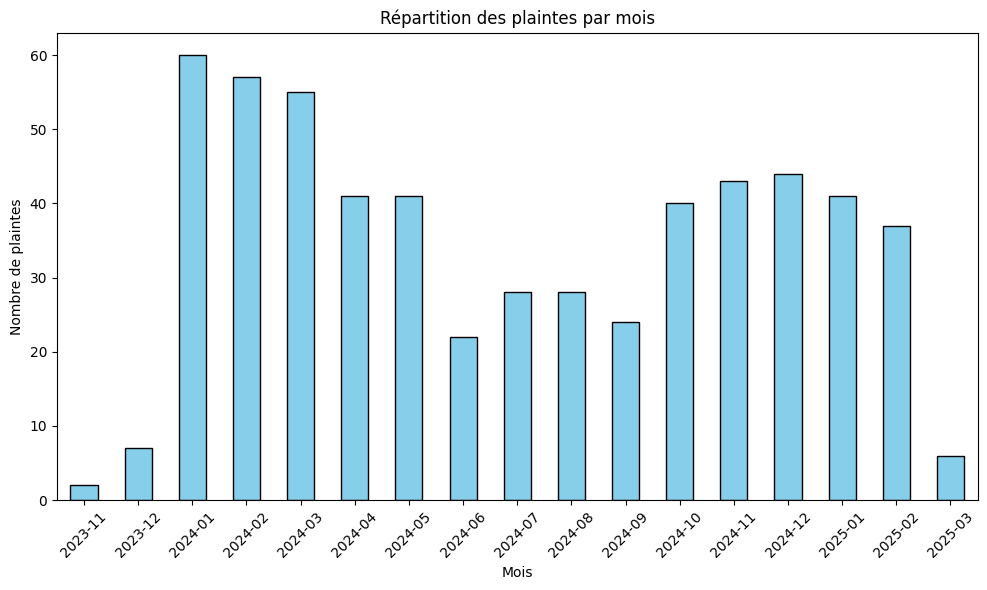

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données à partir du fichier CSV
df = pd.read_csv('model_responses.csv')

# Convertir la colonne 'date' en format datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extraire le mois et l'année de la colonne 'date'
df['year_month'] = df['date'].dt.to_period('M')

# Compter le nombre de plaintes par mois
complaints_by_month = df['year_month'].value_counts().sort_index()

# Afficher la répartition des plaintes par mois
print("\nRépartition des plaintes par mois :")
print(complaints_by_month)

# Visualisation avec un graphique
plt.figure(figsize=(10,6))
complaints_by_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Répartition des plaintes par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de plaintes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Répartition des sentiments avant création du graphique :
sentiment
négatif    499
neutre      68
positif      9
Name: count, dtype: int64


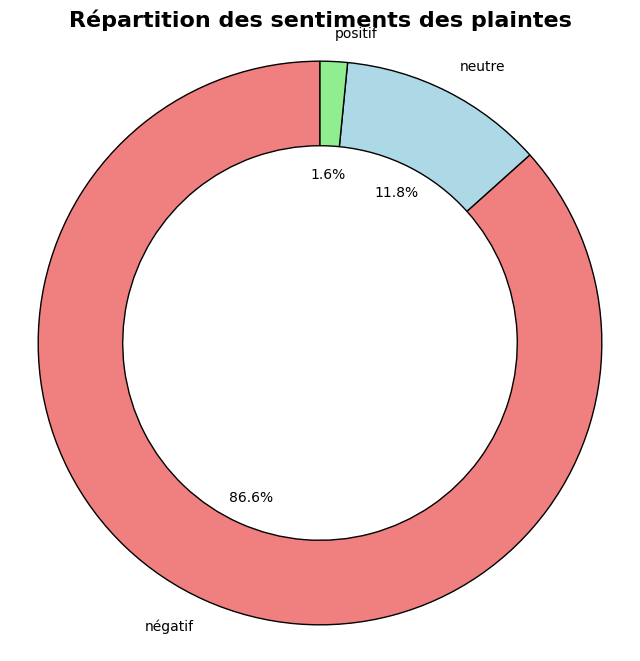

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données à partir du fichier CSV
df = pd.read_csv('model_responses.csv')

# Supprimer les lignes où le sentiment est 'inconnu'
df = df[df['sentiment'] != 'inconnu']

# Vérifier les données de la colonne 'sentiment' et afficher les catégories disponibles
print("\nRépartition des sentiments avant création du graphique :")
print(df['sentiment'].value_counts())

# Créer le graphique en camembert
sentiment_counts = df['sentiment'].value_counts()

# Définir la taille du graphique
plt.figure(figsize=(8,8))

# Créer le graphique en camembert avec des tranches plus espacées
plt.pie(sentiment_counts, 
        labels=sentiment_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightcoral', 'lightblue', 'lightgreen'], 
        wedgeprops={'width': 0.3, 'edgecolor': 'black', 'linewidth': 1})  # 'width' définit l'espacement

# Ajouter un titre
plt.title("Répartition des sentiments des plaintes", fontsize=16, fontweight='bold')

# Assurer que le graphique soit circulaire
plt.axis('equal')  

# Afficher le graphique
plt.show()



Répartition des catégories après filtrage :
category
problème de facturation        253
service client injoignable      85
information complémentaire      49
panne et urgences               44
problème avec l'application     37
délai d'intervention             8
Name: count, dtype: int64


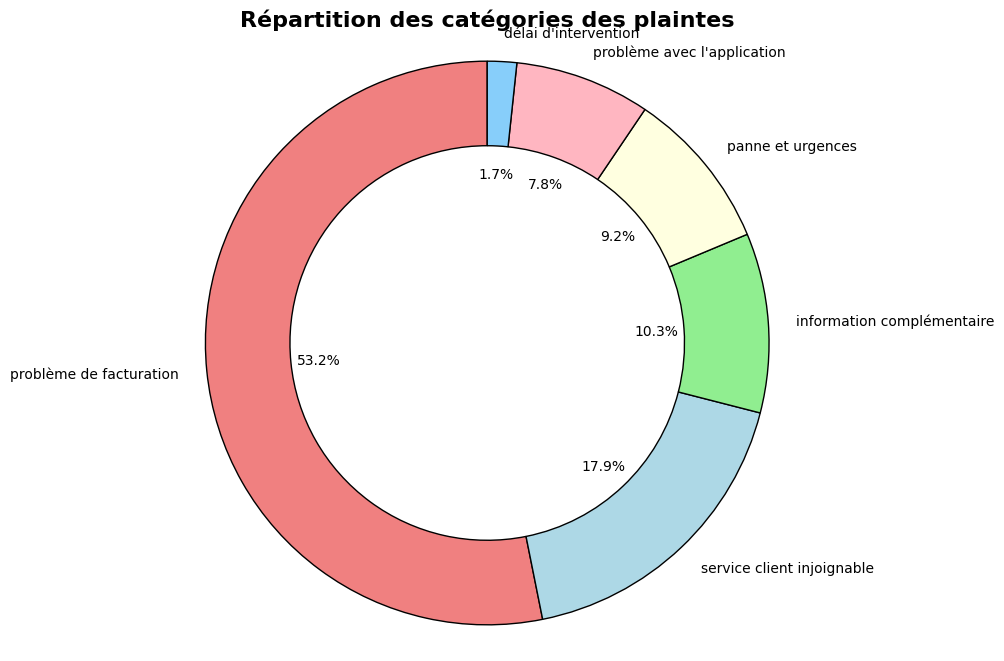

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données à partir du fichier CSV
df = pd.read_csv('model_responses.csv')

# Supprimer les lignes où le sentiment est 'inconnu'
df = df[df['sentiment'] != 'inconnu']

# Filtrer les lignes où la catégorie contient "Catégorie:" sauf "Catégorie : Delai d'intervention"
# et où la catégorie contient "problème d'âge"
df = df[~(df['category'].str.contains("Catégorie:") & ~df['category'].str.contains("Catégorie : Delai d'intervention"))]
df = df[~df['category'].str.contains("problème d'âge", case=False, na=False)]  # Exclure "problème d'âge" (insensible à la casse)

# Vérifier les données de la colonne 'category' après filtrage
print("\nRépartition des catégories après filtrage :")
print(df['category'].value_counts())

# Créer le graphique en camembert pour les catégories
category_counts = df['category'].value_counts()

# Définir la taille du graphique
plt.figure(figsize=(8,8))

# Créer le graphique en camembert
plt.pie(category_counts, 
        labels=category_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightskyblue'], 
        wedgeprops={'width': 0.3, 'edgecolor': 'black', 'linewidth': 1})  # 'width' définit l'espacement

# Ajouter un titre
plt.title("Répartition des catégories des plaintes", fontsize=16, fontweight='bold')

# Assurer que le graphique soit circulaire
plt.axis('equal')  

# Afficher le graphique
plt.show()


0          date
1    2023-11-16
2    2023-11-26
3    2023-12-21
4    2023-12-28
5    2023-12-29
6    2023-12-29
7    2023-12-29
8    2023-12-29
9    2023-12-30
Name: date, dtype: object

Nombre de valeurs NaT dans la colonne 'date' :
1


<Figure size 1000x600 with 0 Axes>

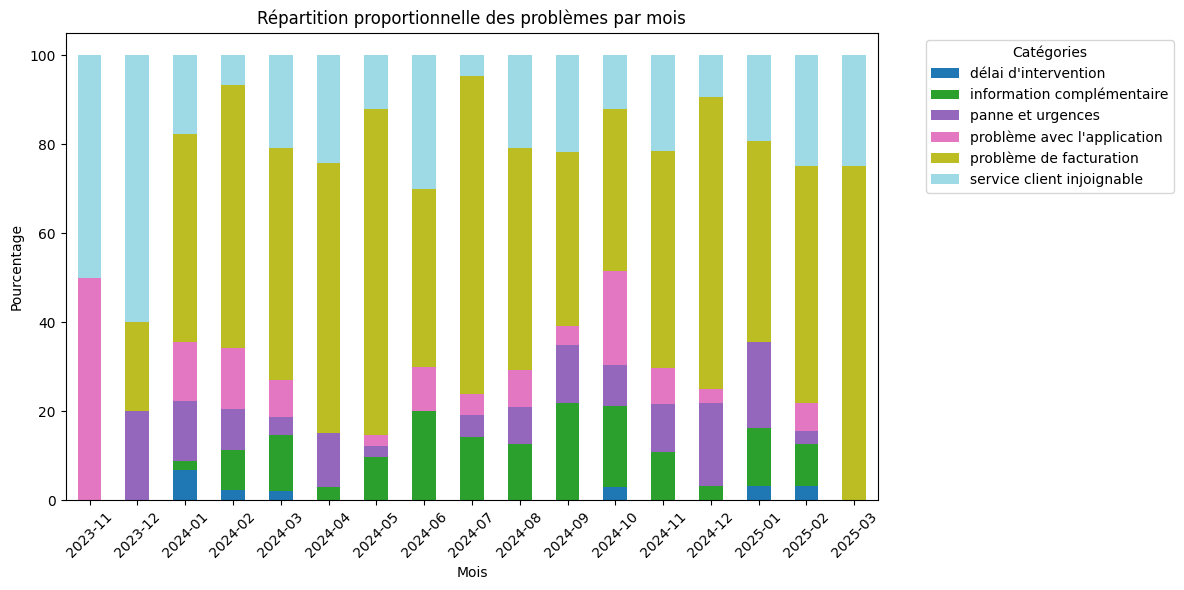

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données à partir du fichier CSV
df = pd.read_csv('model_responses.csv')

# Vérifier les 10 premières lignes pour voir le format de la date
print(df['date'].head(10))

# Convertir la colonne 'date' en format datetime, en gérant les erreurs
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Vérifier si des valeurs 'NaT' ont été générées
print("\nNombre de valeurs NaT dans la colonne 'date' :")
print(df['date'].isnull().sum())

# Si des valeurs NaT existent, les supprimer ou les traiter
df = df.dropna(subset=['date'])

# Ajouter une colonne 'mois' basée sur la date (extraction du mois et de l'année)
df['mois'] = df['date'].dt.to_period('M')  # Utiliser Period pour obtenir le mois et l'année

# Filtrer les catégories indésirables (comme expliqué précédemment)
df = df[~(df['category'].str.contains("Catégorie:") & ~df['category'].str.contains("Catégorie : Delai d'intervention"))]
df = df[~df['category'].str.contains("problème d'âge", case=False, na=False)]

# Grouper par mois et catégorie et compter les occurrences
monthly_category_counts = df.groupby(['mois', 'category']).size().unstack(fill_value=0)

# Normaliser les données pour obtenir des proportions (en %)
monthly_category_percent = monthly_category_counts.divide(monthly_category_counts.sum(axis=1), axis=0) * 100

# Créer un graphique à barres empilées de base 100
plt.figure(figsize=(10, 6))
monthly_category_percent.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 6))

# Ajouter des labels et un titre
plt.xlabel('Mois')
plt.ylabel('Pourcentage')
plt.title('Répartition proportionnelle des problèmes par mois')

# Ajouter une légende
plt.legend(title='Catégories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotation des labels des mois pour plus de lisibilité
plt.xticks(rotation=45)

# Ajuster l'affichage pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()


C:\Users\yvenl\AppData\Local\Temp\ipykernel_36268\587464526.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='score', y='category', data=df, palette='coolwarm')


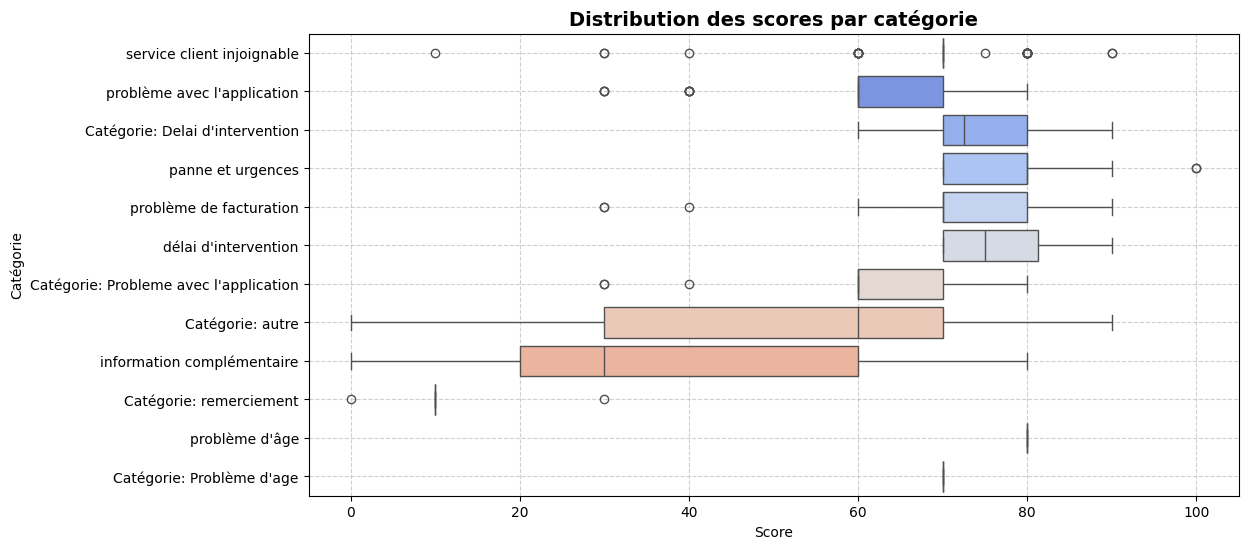

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données à partir du fichier CSV
df = pd.read_csv('model_responses.csv')

# Supprimer les lignes où le sentiment est 'inconnu'
df = df[df['sentiment'] != 'inconnu']

# Convertir la colonne 'date' en format datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Supprimer les lignes avec des dates invalides
df = df.dropna(subset=['date'])

# Créer un boxplot pour visualiser la distribution des scores par catégorie
plt.figure(figsize=(12, 6))
sns.boxplot(x='score', y='category', data=df, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Distribution des scores par catégorie', fontsize=14, fontweight='bold')
plt.xlabel('Score')
plt.ylabel('Catégorie')

# Afficher le graphique
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
